In [ ]:
!pip install --upgrade statsmodels
!pip install pmdarima
from pmdarima.arima import auto_arima

     |████████████████████████████████| 9.8 MB 11.9 MB/s 
     |████████████████████████████████| 233 kB 75.3 MB/s 
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.1
    Uninstalling patsy-0.5.1:
      Successfully uninstalled patsy-0.5.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 1.4 MB 12.9 MB/s 


In [ ]:

import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pandas import datetime
from matplotlib import pyplot

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import rmse
import math
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMA

In [ ]:

def parser(t):
    return datetime.strptime(t,"\'[%H:%M:%S %d/%m/%Y]\'")


df = pd.read_csv("samples.csv",header=0,index_col=0,parse_dates=['Time and date'] , date_parser = parser,squeeze=True) 
df.head(5)

Time and date
1995-05-11 11:00:24    70
1995-05-11 11:00:25    70
1995-05-11 11:00:26    70
1995-05-11 11:00:27    70
1995-05-11 11:00:28    69
Name: PULSE, dtype: int64

In [ ]:


for i in range(1,len(df)):
  if df[i]==0:
    df[i]=df[i-1]
df1=df
df1 = df1.resample('5S').mean()
#last 5mins data



In [ ]:
dfn = df1[-60:]
dfn[1]

58.8

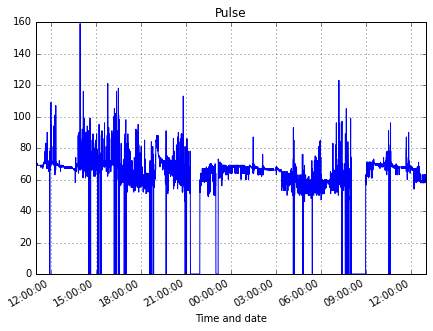

In [ ]:
plt.style.use('classic')
%matplotlib inline
plt.figure(figsize=(7,5))
df.plot()
plt.title('Pulse')
plt.grid()
plt.show()

Box-plot: to understand the distribution of values by time interval. Outliers can be detected i.e, irrelavent values (like 0 in the above graph) so that these can be replaced with other relavent values.

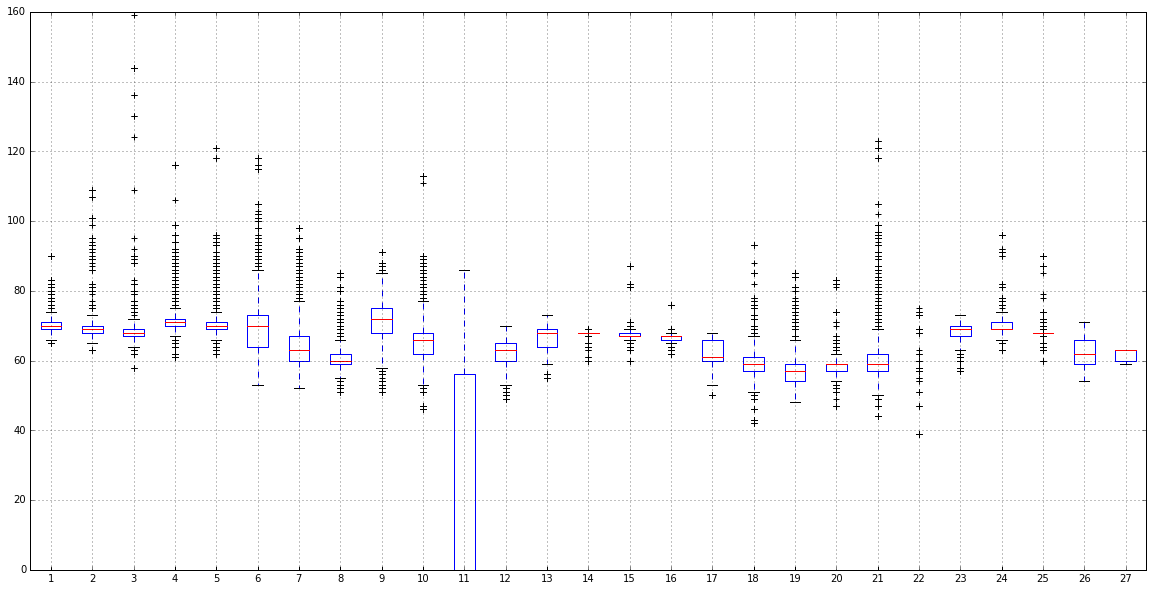

In [ ]:
from pandas import Grouper, DataFrame,concat
# one_day = df['1995-05-11']

groups = df.groupby(Grouper(freq='H'))

# for x in groups:
#   print(x)

hours = concat([DataFrame(x[1].values) for x in groups], axis=1)
hourse = DataFrame(hours)
hours.columns = range(1,28)

plt.figure(figsize=(20,10))
hours.boxplot()
plt.show()

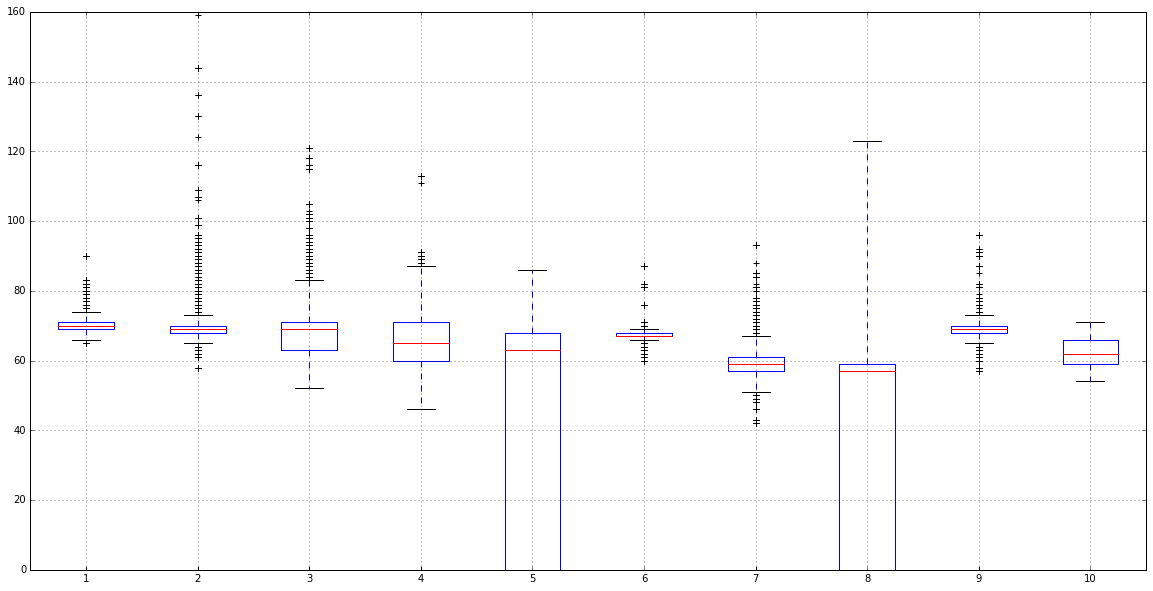

In [ ]:
groups = df.groupby(Grouper(freq='3H'))

# for x in groups:
#   print(x)

hours = concat([DataFrame(x[1].values) for x in groups], axis=1)
hourse = DataFrame(hours)
hours.columns = range(1,11)

plt.figure(figsize=(20,10))
hours.boxplot()
plt.show()

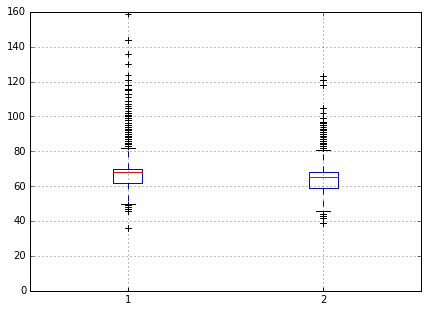

In [ ]:

groups = df.groupby(Grouper(freq='D'))
dates = concat([DataFrame(x[1].values) for x in groups], axis=1)
dates = DataFrame(dates)
dates.columns = range(1,3)

plt.figure(figsize=(7,5))
dates.boxplot()
plt.show()

The PULSE is stable on the second day when compared to the day-1

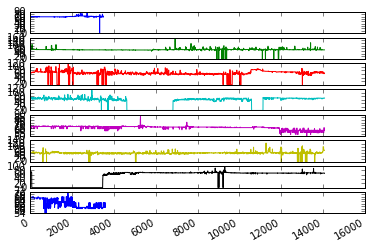

In [ ]:
groups = df.groupby(Grouper(freq='4H'))
hours = concat([DataFrame(x[1].values) for x in groups], axis=1)
hours = DataFrame(hours)
hours.columns = range(1,9)


hours.plot(subplots=True,legend=False)
# plt.figure(figsize=(20,10))

plt.show()


# hours.boxplot()
plt.show()

To compare the relation b/w the previous and present values plotting lag plot with lag=1. Since it is one day data... we cannot compare b/w days.
Try to get more than one day data and compare within days to observe any trends.

Text(0.5, 1.0, 'Pulse')

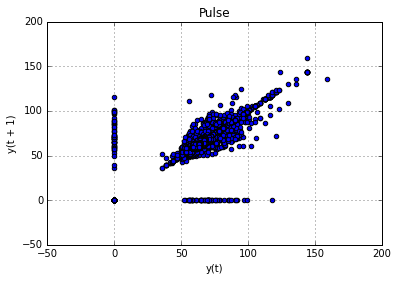

In [ ]:
from pandas.plotting import lag_plot, autocorrelation_plot
lag_plot(df) #lag=1
plt.grid()
plt.title('Pulse')


Seasonal trends - explains the periodic upps and downs. in a on day data, the peak and low pulse is at what point of time.

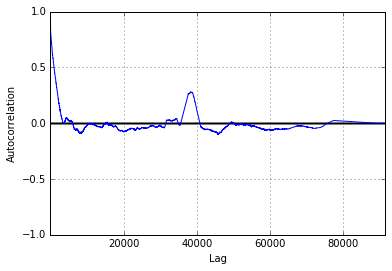

In [ ]:
autocorrelation_plot(df)
plt.show()

### Resamling Dataset

In [ ]:
df1=df

for i in range(1,len(df)):
  if df[i]==0:
    df[i]=df[i-1]



Text(0.5, 1.0, 'Pulse')

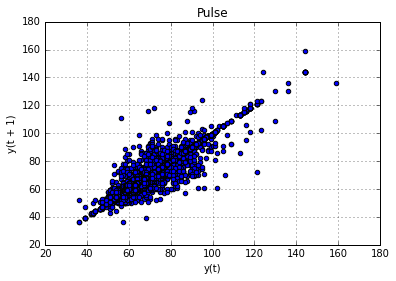

In [ ]:
from pandas.plotting import lag_plot, autocorrelation_plot
lag_plot(df,lag=1) #lag=1
plt.grid()
plt.title('Pulse')

In [ ]:
df1 = df1.resample('10S').mean()
df1

Time and date
1995-05-11 11:00:20    69.666667
1995-05-11 11:00:30    69.000000
1995-05-11 11:00:40    69.200000
1995-05-11 11:00:50    70.000000
1995-05-11 11:01:00    70.000000
                         ...    
1995-05-12 13:00:30    59.222222
1995-05-12 13:00:40    59.400000
1995-05-12 13:00:50    61.200000
1995-05-12 13:01:00    63.000000
1995-05-12 13:01:10    62.000000
Freq: 10S, Name: PULSE, Length: 9366, dtype: float64

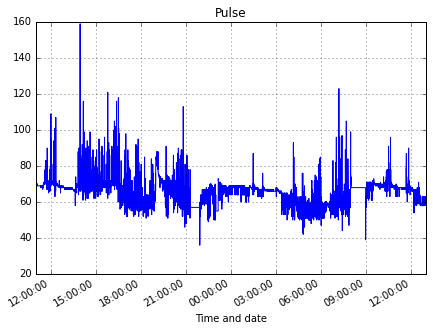

In [ ]:
plt.figure(figsize=(7,5))
df.plot()
plt.title('Pulse')
plt.grid()
plt.show()

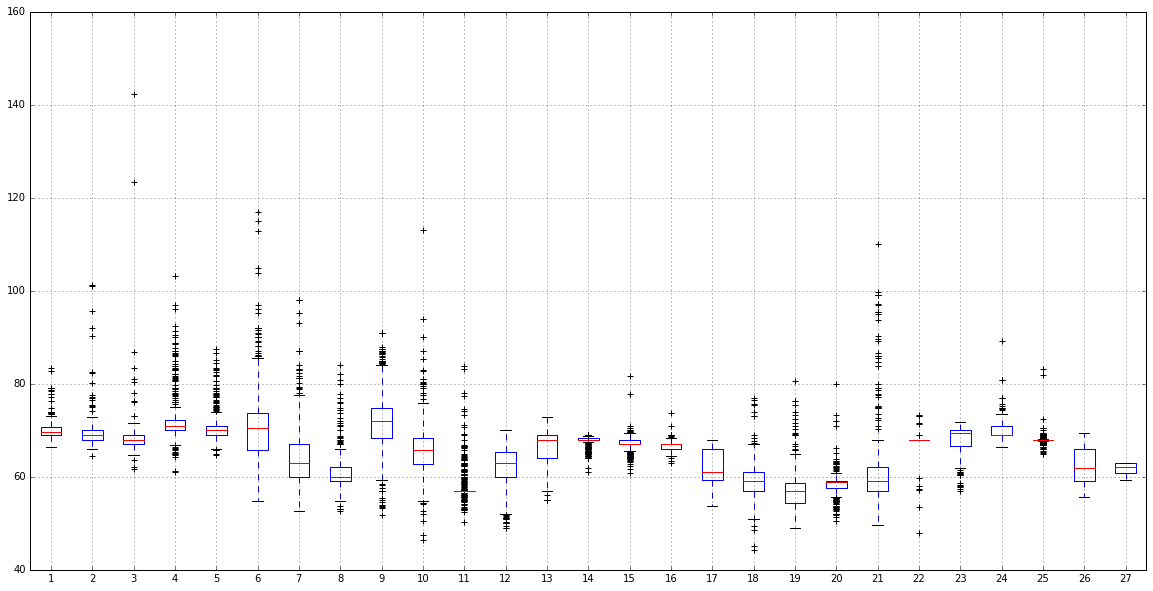

In [ ]:
# one_day = df['1995-05-11']
groups = df1.groupby(Grouper(freq='H'))

# for x in groups:
#   print(x)

hours = concat([DataFrame(x[1].values) for x in groups], axis=1)
hourse = DataFrame(hours)
hours.columns = range(1,28)

plt.figure(figsize=(20,10))
hours.boxplot()
plt.show()

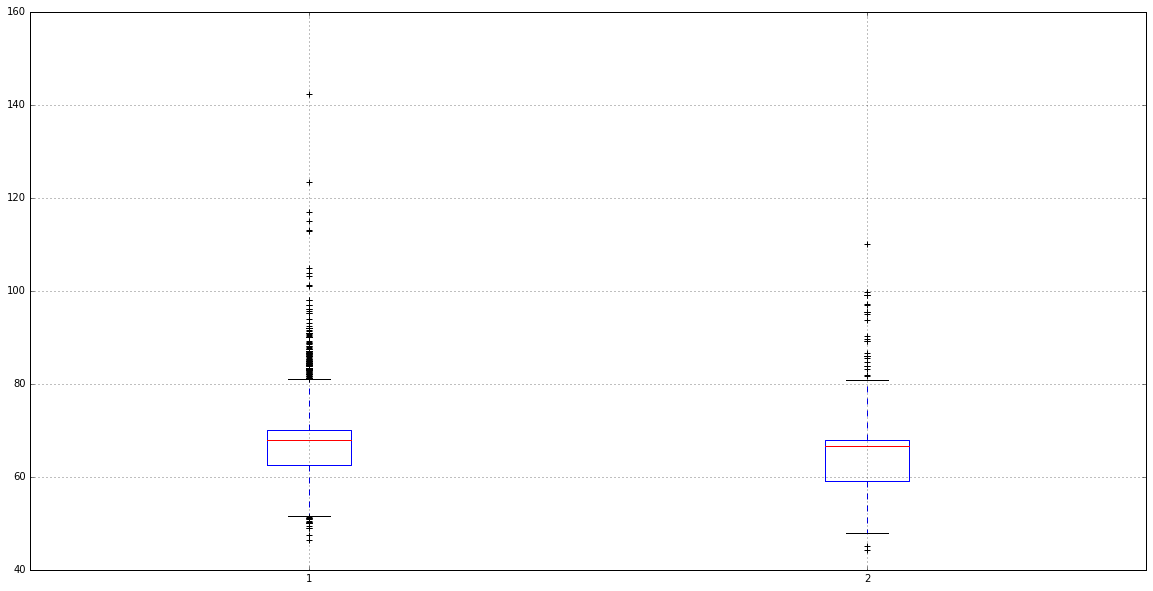

In [ ]:
# one_day = df['1995-05-11']
groups = df1.groupby(Grouper(freq='D'))
dates = concat([DataFrame(x[1].values) for x in groups], axis=1)
dates = DataFrame(dates)
dates.columns = range(1,3)

plt.figure(figsize=(20,10))
dates.boxplot()
plt.show()

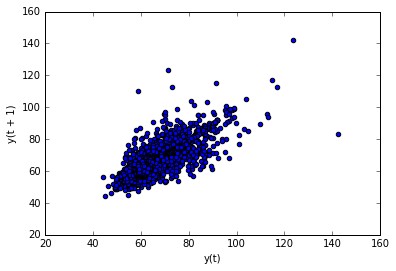

In [ ]:
from pandas.plotting import lag_plot, autocorrelation_plot
lag_plot(df1) #lag=1

In [ ]:
# correlation
values = DataFrame(df1.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)


#=> good correlation

          t-1       t+1
t-1  1.000000  0.860204
t+1  0.860204  1.000000


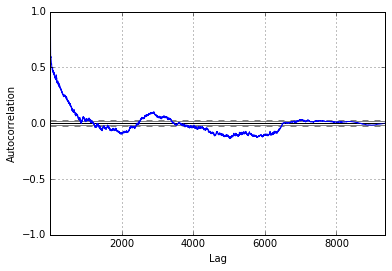

In [ ]:
autocorrelation_plot(df1)

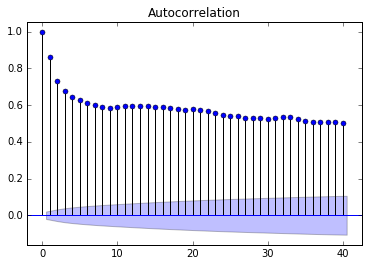

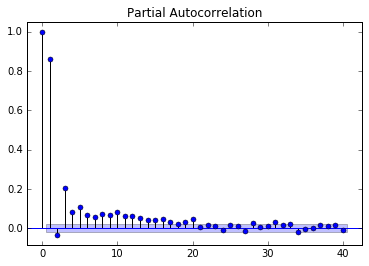

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df1)
plt.show()
plot_pacf(df1)
plt.show()

In [ ]:
groups = df1.groupby(Grouper(freq='4H'))
hours = concat([DataFrame(x[1].values) for x in groups], axis=1)
hourse = DataFrame(hours)
hours.columns = range(1,9)


Agumented Dickey Fuller Test - to test whether the data is stationary or not. This test is used to check whether the series has unit root or not? if it exists, the model is stationary.

What is stationary data - mean, variance and autocorrelation sturcture do not change/depend with time
If the data donot have trend/seasonality, it is stationary.
trends (long-term increasing or decreasing movement)
seasonality (consistent periodic structure)


How to make data stationary - if there is clear trend,sesonality then model the components, remove from observations and train models on residuals

In [ ]:
X=df1.values
X1,X2 = X[:round(len(X)/2)],X[round(len(X)/2):]
mean1,mean2 = X1.mean(),X2.mean()
var1,var2 = X1.var(),X2.var()
print(mean1,mean2)
print(var1,var2)

67.1608370702541 64.33303437967115
50.09430384926159 31.461657758951226


Mean doesn't vary much... variance?

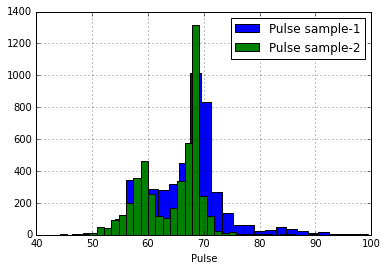

In [ ]:
df11, df12 = df1[:round(len(X)/2)],df1[round(len(X)/2):] 
df11.hist(bins=50)
df12.hist(bins=50)
plt.legend(['Pulse sample-1','Pulse sample-2'])
plt.xlim(40, 100)
plt.xlabel('Pulse')
plt.show()

Not a gaussian => mean and variance are less meaningful => can be non-stationary

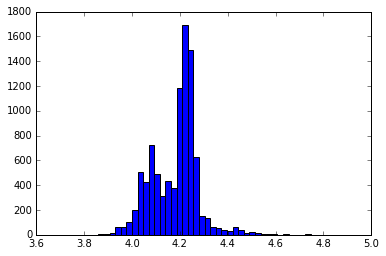

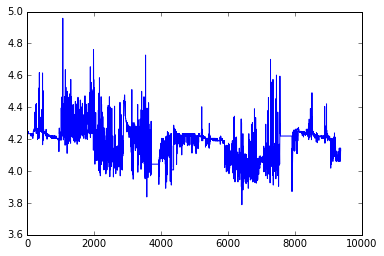

In [ ]:
X_log = np.log(X)
plt.hist(X_log,bins=50)
plt.show()
plt.plot(X_log)
plt.show()

Not an exponential sesonality

In [ ]:
#ADF #kpss #PP
from statsmodels.tsa.stattools import adfuller,kpss

X=df1.values
result_adf = adfuller(df1)
print(result_adf)

result_kpss = kpss(df1)
print(result_kpss)





(-5.656922383771096, 9.573784079647399e-07, 33, 9332, {'1%': -3.431050932240579, '5%': -2.861849767913357, '10%': -2.5669348843771203}, 47994.46214351107)
(4.208890465992514, 0.01, 38, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


ADF - to determine given series follows a trend or not.
The test statistic is -5. The more negative the statistic is, the more we reject null hypothesis. The statistic value < 5%,1% values => rejecting null hypothesis. Also p-value is close to zero.
Hence stationary...!!


Similarly kpss test(null-hypo:stationary series). if p-val<0.05 => non-stationary
here p-val>0.05 => stationary 

In [ ]:
# ADF test
import pmdarima
adf_test = pmdarima.arima.ADFTest(alpha=0.05)
adf_test.should_diff(df1)


(0.01, False)

# Models

Basic model: 
Persistance model, it uses t-1 value to predict the t+1 value.
baseline algo 

           0
0  69.666667
1  69.000000
2  69.200000
3  70.000000
4  70.000000
           0          0
0        NaN  69.666667
1  69.666667  69.000000
2  69.000000  69.200000
3  69.200000  70.000000
4  70.000000  70.000000
[[        nan 69.66666667]
 [69.66666667 69.        ]
 [69.         69.2       ]
 ...
 [68.         68.        ]
 [68.         68.        ]
 [68.         68.        ]]
RMSE is 4.358153920513632


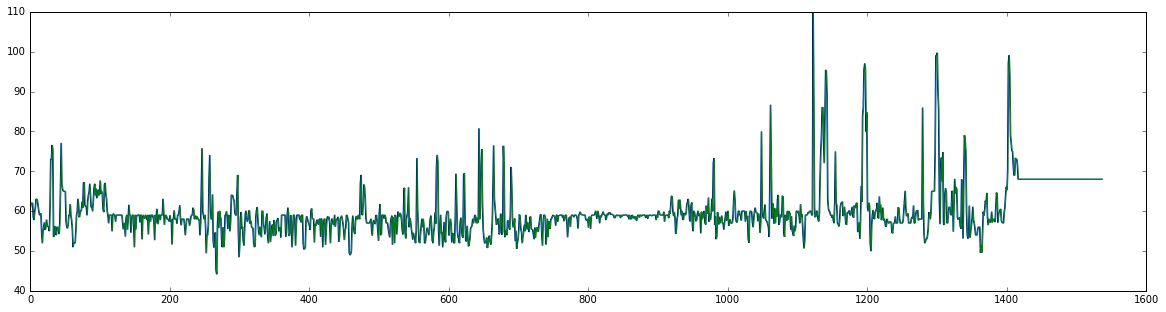

In [ ]:
vals = pd.DataFrame(df1.values)
print(vals.head())
dataframe = pd.concat([vals.shift(1),vals],axis=1)
print(dataframe.head())
X=dataframe.values
print(X)
train,test = X[:int(len(X)*0.8)],X[int(len(X)*0.8):]
# 10*6*3 = last 3mins
train_X,train_y = train[:,0],train[:,1]
test_X,test_y = test[:,0],test[:,1]

def model_persistence(x):
  return x

predictions = list()
for x in test_X:
  yhat = model_persistence(x)
  predictions.append(yhat)
err_pm = rmse(test_y, predictions)
print('RMSE is {}'.format(err_pm))

plt.figure(figsize=(20,5))
plt.plot(test_y)
plt.plot(predictions)
plt.show()

Trani - Test split

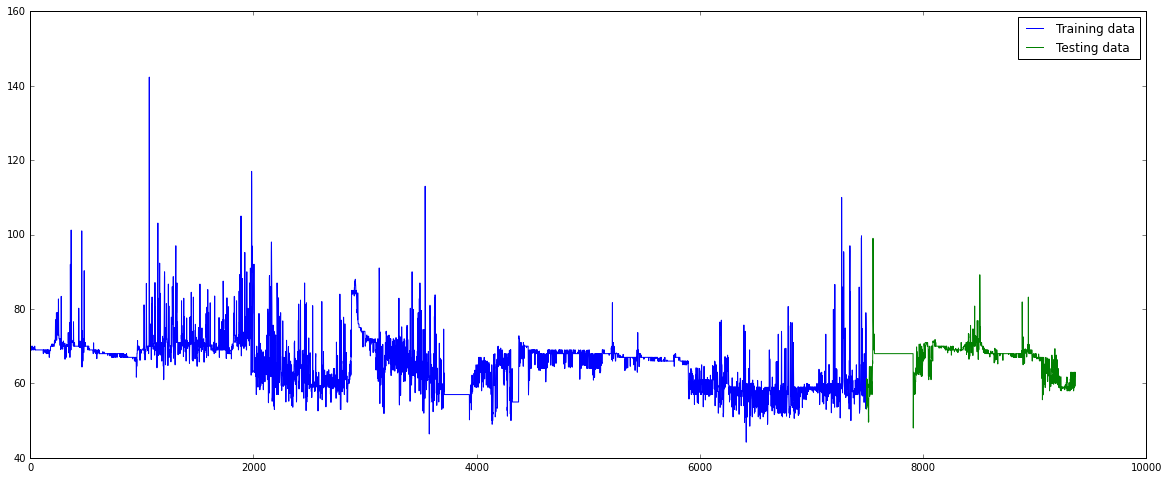

In [ ]:
X = df1.values
train,test = X[:int(len(X)*0.8)],X[int(len(X)*0.8):]

plt.figure(figsize=(20,8))
plt.plot(train)
plt.plot([None for i in train]+[x for x in test])
plt.legend(['Training data', 'Testing data'])
plt.show()
#train data & test data

Observations: 4684
Training : 2343
Testing : 2341
Observations: 7025
Training : 4684
Testing : 2341
Observations: 9366
Training : 7025
Testing : 2341


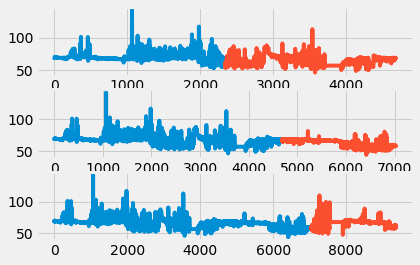

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
splits = TimeSeriesSplit(n_splits = 3)

plt.figure(1)
index=1
for train_index, test_index in splits.split(X):
	train = X[train_index]
	test = X[test_index]
	print('Observations: %d' % (len(train) + len(test)))
	print('Training : %d' % (len(train)))
	print('Testing : %d' % (len(test)))
	plt.subplot(310 + index)
	plt.plot(train)
	plt.plot([None for i in train] + [x for x in test])
	index += 1
plt.show()

Auto regression model - linear reg using lagged values

Basic:

4.458883373741747
3.820535344893763


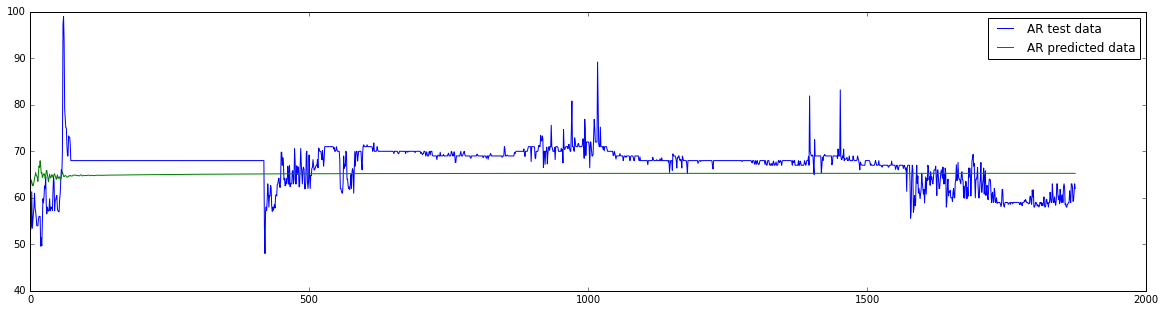

In [ ]:
lags = 60
model = AutoReg(train,lags=lags)
model_fit = model.fit()

AR_predictions = model_fit.predict(start=len(train),end=len(X)-1)

rmse_ar = rmse(test,AR_predictions)
print(rmse_ar)

mae = mean_absolute_error(test,AR_predictions)
print(mae)

plt.figure(figsize=(20,5))
plt.plot(test)
plt.plot(AR_predictions)
plt.legend(['AR test data','AR predicted data'])
plt.show()


With window validation

In [ ]:

# lags = 60
# model = AutoReg(train,lags=lags)
# model_fit = model.fit()
# coef = model_fit.params

# window = lags #1
# history = train[len(train)-window :]
# history = [history[i] for i in range(len(history))]
# predictions = list()
# for t in range(len(test)):
# 	length = len(history)
# 	lag = [history[i] for i in range(length-window,length)]
# 	yhat = coef[0]
# 	for d in range(window):
# 		yhat += coef[d+1] * lag[window-d-1]
# 	obs = test[t]
# 	predictions.append(yhat)
# 	history.append(obs)

# rmse_ar = rmse(test,predictions)
# print(rmse_ar)

# plt.figure(figsize=(20,5))
# plt.plot(test)
# plt.plot(predictions)
# plt.show()

Moving Average: takes the average of raw observations.
centered MA: Smoothing method to remove seasonality and trneds (or) to remove the irregularities in the data
trailing MA: avg of present and past values to predict next value. Used for forecasting. To do this, the data has to be stationary.(no trend/seasonality).


9.48359073304225
8.452526448113007


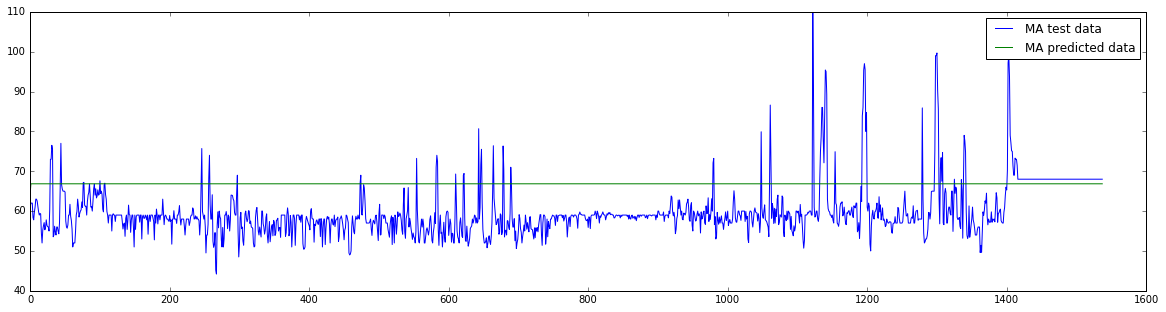

In [ ]:
model = ARIMA(train,order=(0,0,1))
model_fit=model.fit()
MA_predictions = model_fit.predict(start=len(train),end=len(X)-1)

rmse_ar = rmse(test,MA_predictions)
print(rmse_ar)

mae = mean_absolute_error(test,MA_predictions)
print(mae)

plt.figure(figsize=(20,5))
plt.plot(test)
plt.plot(MA_predictions)
plt.legend(['MA test data','MA predicted data'])
plt.show()

#### ARIMA

In [ ]:
train_data,test_data = X[:int(len(X)*0.8)],X[int(len(X)*0.8):]

66.03054124885698


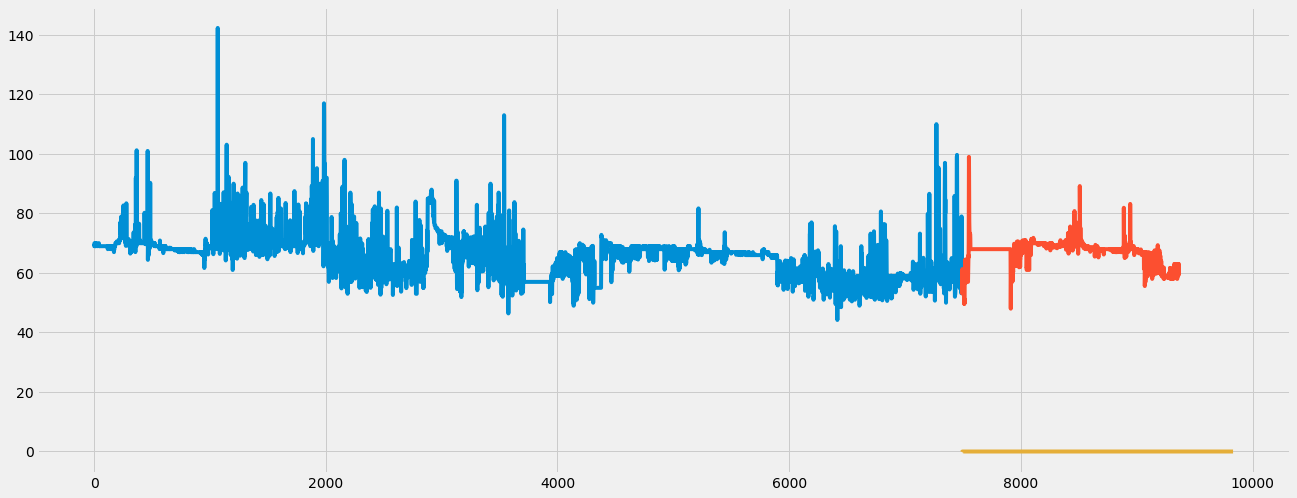

In [ ]:
model_arima = ARIMA(train,order=(6,1,1))
model_fit_arima=model_arima.fit()
dir_predictions = model_fit_arima.predict(start=len(train),end=len(X)-1)

rmse_arima = rmse(test,dir_predictions)
print(rmse_arima)

plt.figure(figsize=(20,8))
plt.plot(train_data)
plt.plot([None for i in train_data]+[x for x in test_data])
plt.plot([None for i in train_data]+[x for x in dir_predictions])
plt.show()

In [ ]:
model_arima = ARIMA(train,order=(6,0,1))
model_fit_arima=model_arima.fit()
arima_predictions = model_fit_arima.predict(start=len(train),end=len(X)-1)

rmse_arima = rmse(test,arima_predictions)
print(rmse_arima)

mae = mean_absolute_error(test,arima_predictions)
print(mae)

4.384916744692772
3.730479695996936


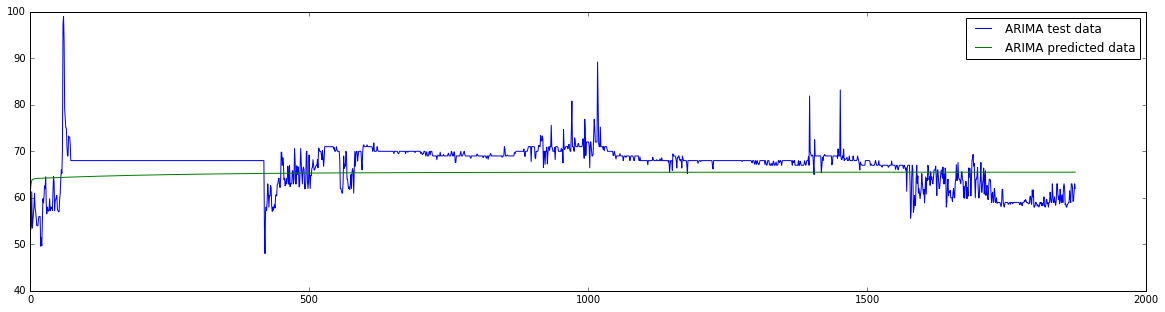

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(test)
plt.plot(arima_predictions)
plt.legend(['ARIMA test data','ARIMA predicted data'])
plt.show()

In [ ]:
# plt.figure(figsize=(20,8))
# plt.plot(train_data)
# plt.plot([None for i in train_data]+[x for x in test_data])
# plt.plot([None for i in train_data]+[x for x in dir_predictions])
# plt.show()

lags = 5/10  ddiff=0 (since stationary) window=1

In [ ]:
train_data,test_data = X[:int(len(X)*0.8)],X[int(len(X)*0.8):]

In [ ]:

history = [x for x in train_data]
predictions = list()

lags=1
diff=0
window=1

for t in range(len(test_data)):
  print(t,end=" ")
  model=ARIMA(history,order=(lags,diff,window))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  true_obs = test_data[t]
  history.append(true_obs)

print("\n")
MSE_error = mean_squared_error(test_data, predictions)
print('RMSE is {}'.format(math.sqrt(MSE_error)))

mae = mean_absolute_error(test_data,predictions)
print(mae)

# o/p = 1.82

1718 1719 1720 1721 1722 1723 1724 1725 1726 1727 1728 1729 1730 1731 1732 1733 1734 1735 1736 1737 1738 1739 1740 1741 1742 1743 1744 1745 1746 1747 1748 1749 1750 1751 1752 1753 1754 1755 1756 1757 1758 1759 1760 1761 1762 1763 1764 1765 1766 1767 1768 1769 1770 1771 1772 1773 1774 1775 1776 1777 1778 1779 1780 1781 1782 1783 1784 1785 1786 1787 1788 1789 1790 1791 1792 1793 1794 1795 1796 1797 1798 1799 1800 1801 1802 1803 1804 1805 1806 1807 1808 1809 1810 1811 1812 1813 1814 1815 1816 1817 1818 1819 1820 1821 1822 1823 1824 1825 1826 1827 1828 1829 1830 1831 1832 1833 1834 1835 1836 1837 1838 1839 1840 1841 1842 1843 1844 1845 1846 1847 1848 1849 1850 1851 1852 1853 1854 1855 1856 1857 1858 1859 1860 1861 1862 1863 1864 1865 1866 1867 1868 1869 1870 1871 1872 1873 

RMSE is 1.8196403649420774


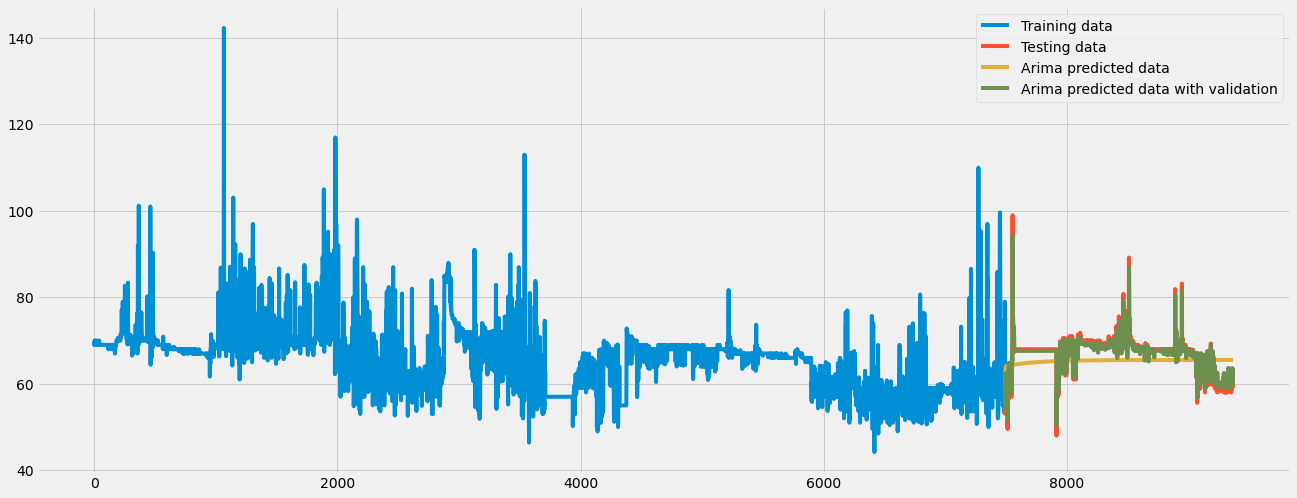

In [ ]:
# model_fit.plot_predict(1,10000)
# xt=model_fit.forecast(steps=200)

plt.figure(figsize=(20,8))
plt.plot(train_data)
plt.plot([None for i in train_data]+[x for x in test_data])
plt.plot([None for i in train_data]+[x for x in dir_predictions])
plt.plot([None for i in train_data]+[x for x in predictions])

plt.legend(["Training data", "Testing data","Arima predicted data","Arima predicted data with validation" ])
plt.show()


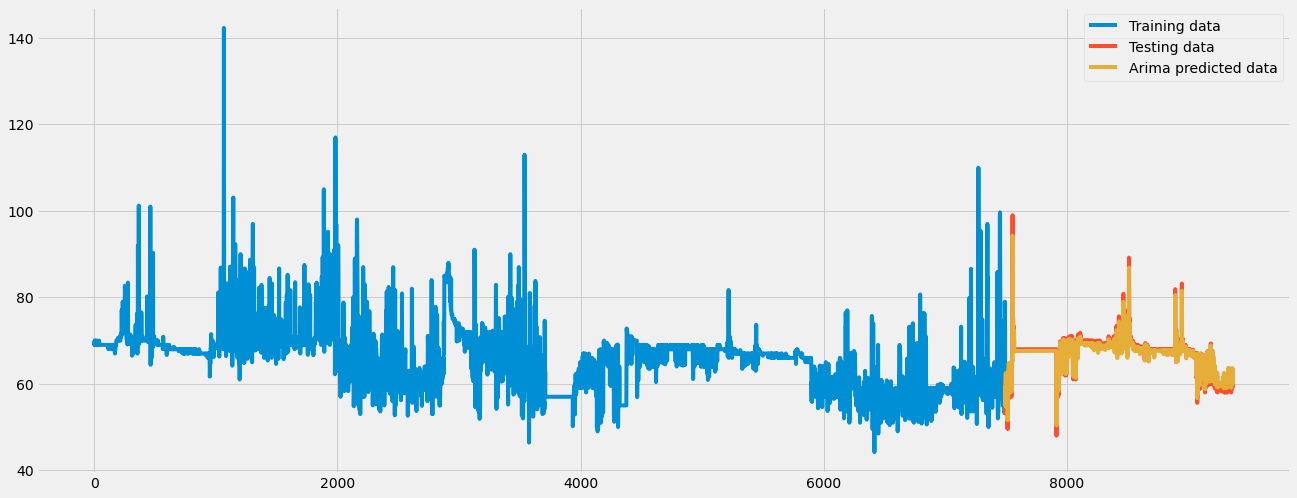

In [ ]:

plt.figure(figsize=(20,8))
plt.plot(train_data)
plt.plot([None for i in train_data]+[x for x in test_data])
# plt.plot([None for i in train_data]+[x for x in dir_predictions])
plt.plot([None for i in train_data]+[x for x in predictions])

plt.legend(["Training data", "Testing data","Arima predicted data" ])
plt.show()

# LSTM

In [ ]:
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Bidirectional

from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping



In [ ]:
df2 = df1.reset_index()
df2.head()

,Time and date,PULSE
0,1995-05-11 11:00:20,69.666667
1,1995-05-11 11:00:30,69.000000
2,1995-05-11 11:00:40,69.200000
3,1995-05-11 11:00:50,70.000000
4,1995-05-11 11:01:00,70.000000


In [ ]:

training_set, test_set = df2.iloc[:int(len(X)*0.8),1:2], df2.iloc[int(len(X)*0.8):,1:2]

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []
y_train = []
for i in range(60,int(len(X)*0.8) ):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
dataset_train = df2.iloc[: int(len(X)*0.8), 1:2]
dataset_test = df2.iloc[int(len(X)*0.8) :, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
y_test = []
for i in range(60, len(X)-int(len(X)*0.8)+60):
    X_test.append(inputs[i-60:i, 0])
    y_test.append(inputs[i,0])

X_test = np.array(X_test)
y_test = np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)


(1874, 60, 1)


In [ ]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))


model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mse'])
his_model = model.fit(X_train, y_train, epochs = 100, batch_size = 128, validation_data=(X_test,y_test),shuffle=False)



59/59 [==============================] - 10s 166ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 3.5202e-04 - val_mse: 3.5202e-04
Epoch 97/100
59/59 [==============================] - 10s 168ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 3.9706e-04 - val_mse: 3.9706e-04
Epoch 98/100
59/59 [==============================] - 10s 167ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 3.5093e-04 - val_mse: 3.5093e-04
Epoch 99/100
59/59 [==============================] - 10s 166ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 3.5920e-04 - val_mse: 3.5920e-04
Epoch 100/100
59/59 [==============================] - 10s 168ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 3.7014e-04 - val_mse: 3.7014e-04


In [ ]:
lstm_predicted = model.predict(X_test)
lstm_predicted = sc.inverse_transform(lstm_predicted)



err_LSTM = rmse(dataset_test.values, lstm_predicted)
print('RMSE is {}'.format( err_LSTM))

MSE_error = mean_squared_error(dataset_test.values, lstm_predicted)
print('MSE is {}'.format(MSE_error))

mae = mean_absolute_error(test_data,lstm_predicted)
print(mae)

RMSE is [1.88799788]
MSE is 3.564535984271445
1.1413998936639906


In [ ]:
# lstm_predicted = model.predict(X_test)
# lstm_predicted = sc.inverse_transform(lstm_predicted)



# err_LSTM = rmse(dataset_test.values, lstm_predicted)
# print('RMSE is {}'.format( err_LSTM))

# MSE_error = mean_squared_error(dataset_test.values, lstm_predicted)
# print('MSE is {}'.format(MSE_error))

# mae = mean_absolute_error(test_data,lstm_predicted)
# print(mae)


RMSE is [1.92593871]
MSE is 3.709239931019614
1.2168260614374107


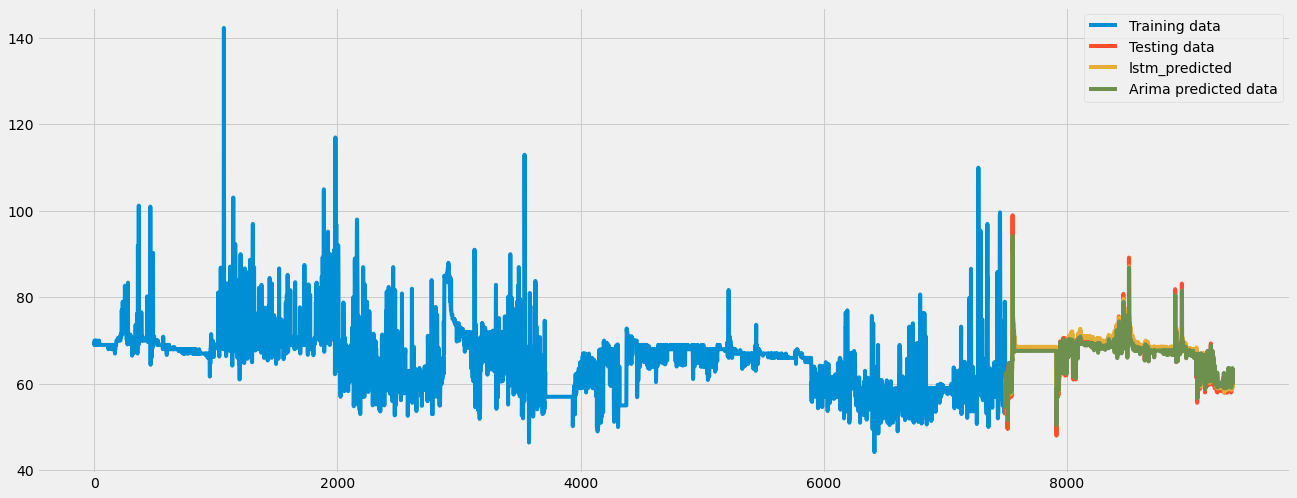

In [ ]:

# plt.figure(figsize=(20,8))
# plt.plot(train_data)
# plt.plot([None for i in train_data]+[x for x in test_data])
# plt.plot([None for i in train_data]+[x for x in lstm_predicted])
# plt.plot([None for i in train_data]+[x for x in predictions])

# plt.legend(["Training data", "Testing data","lstm_predicted","Arima predicted data" ])
# plt.show()

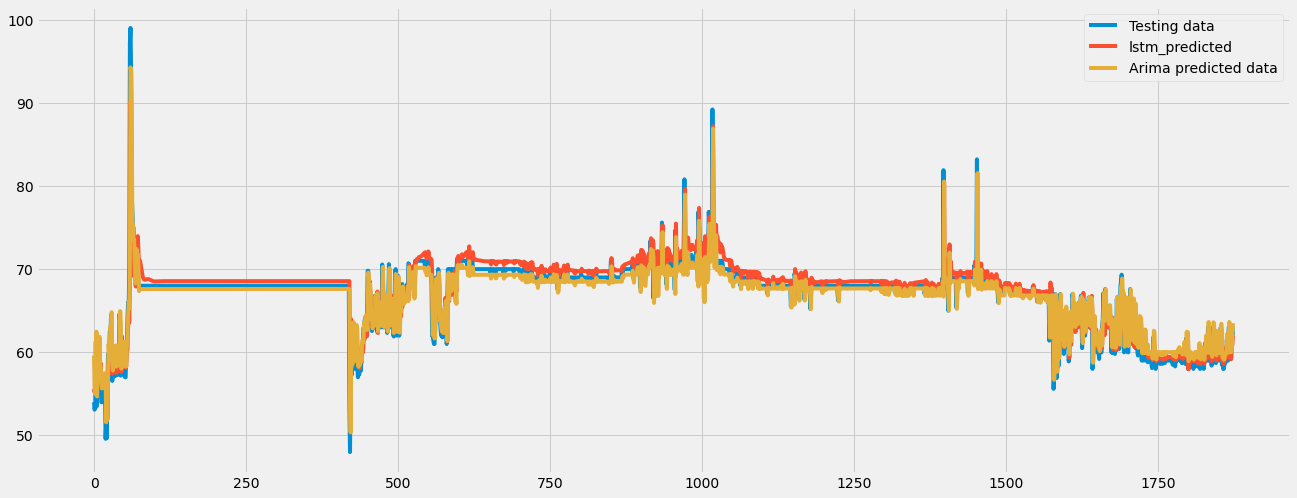

In [ ]:

# plt.figure(figsize=(20,8))
# plt.plot(test_data)
# plt.plot(lstm_predicted)
# plt.plot(predictions)

# plt.legend(["Testing data","lstm_predicted","Arima predicted data" ])
# plt.show()

## GRU

In [ ]:
from keras.optimizers import *

model_gru = Sequential()
model_gru.add(GRU(50, input_shape=(1,1)))
model_gru.add(Dense(1))
# optimizer = Adam(lr=1e-3)
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model_gru.fit(X_train, y_train, epochs=100, batch_size=64, shuffle=False)

117/117 [==============================] - 4s 31ms/step - loss: 0.0013 - accuracy: 2.6911e-04
Epoch 96/100
117/117 [==============================] - 4s 32ms/step - loss: 0.0013 - accuracy: 2.6911e-04
Epoch 97/100
117/117 [==============================] - 4s 32ms/step - loss: 0.0013 - accuracy: 2.6911e-04
Epoch 98/100
117/117 [==============================] - 4s 31ms/step - loss: 0.0013 - accuracy: 2.6911e-04
Epoch 99/100
117/117 [==============================] - 4s 32ms/step - loss: 0.0013 - accuracy: 2.6911e-04
Epoch 100/100
117/117 [==============================] - 4s 31ms/step - loss: 0.0013 - accuracy: 2.6911e-04


In [ ]:
dataset_train = df2.iloc[:int(len(X)*0.8), 1:2]
dataset_test = df2.iloc[int(len(X)*0.8):, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(X)-int(len(X)*0.8)+60):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(1874, 60, 1)


In [ ]:
gru_predicted = model_gru.predict(X_test)
gru_predicted = sc.inverse_transform(gru_predicted)

In [ ]:
err_LSTM = rmse(dataset_test.values, gru_predicted)
print('RMSE is {}'.format( err_LSTM))

MSE_error = mean_squared_error(dataset_test.values, gru_predicted)
print('MSE is {}'.format(MSE_error))

mae = mean_absolute_error(test_data,gru_predicted)
print(mae)

RMSE is [1.7595272]
MSE is 3.0959359594116314
0.8449207873611876


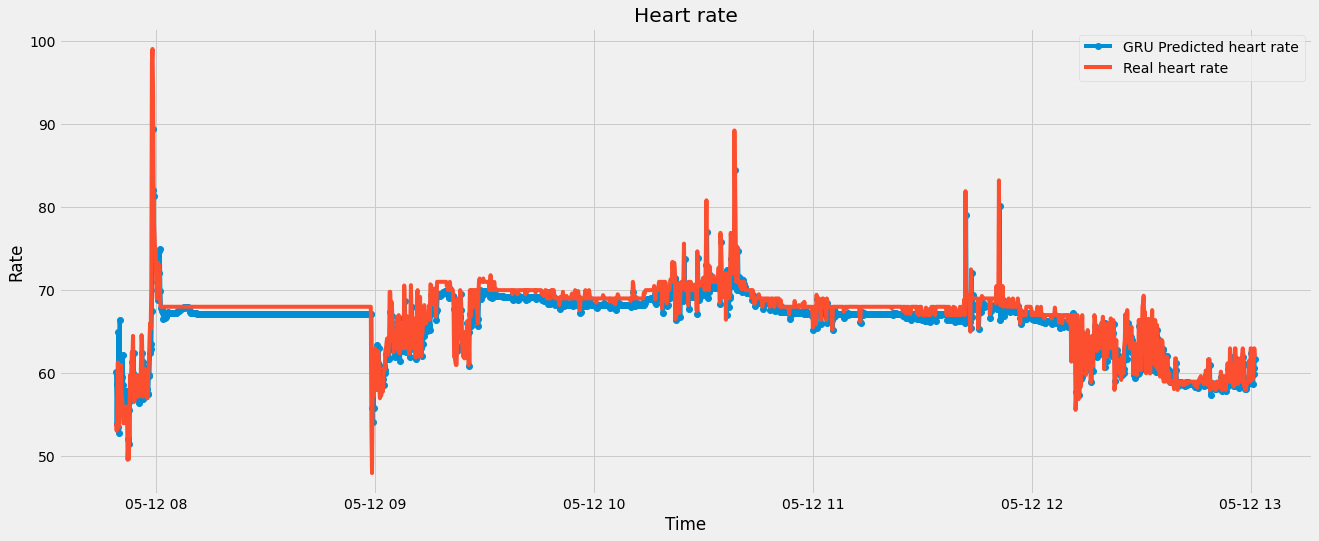

In [ ]:
# Visualising the results
plt.figure(figsize=[20,8])
plt.plot(df2.loc[int(len(X)*0.8):, 'Time and date'],gru_predicted,marker='o', label = 'GRU Predicted heart rate')
plt.plot(df2.loc[int(len(X)*0.8):, 'Time and date'],dataset_test.values, label = 'Real heart rate')


plt.title('Heart rate')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

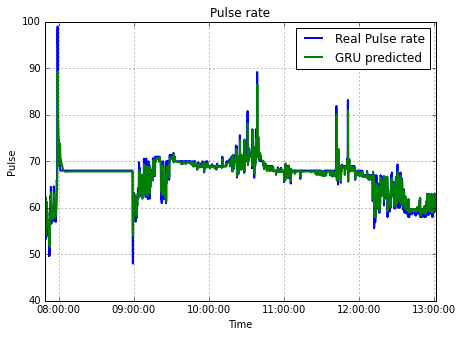

In [ ]:
# Visualising the results
plt.figure(figsize=[7,5])

plt.plot(df2.loc[int(len(X)*0.8):, 'Time and date'],dataset_test.values, label = 'Real Pulse rate',lw=2)
plt.plot(df2.loc[int(len(X)*0.8):, 'Time and date'],gru_predicted,label = 'GRU predicted',lw=2)

plt.grid()

plt.title('Pulse rate')
plt.xlabel('Time')
plt.ylabel('Pulse')
plt.legend()
plt.show()

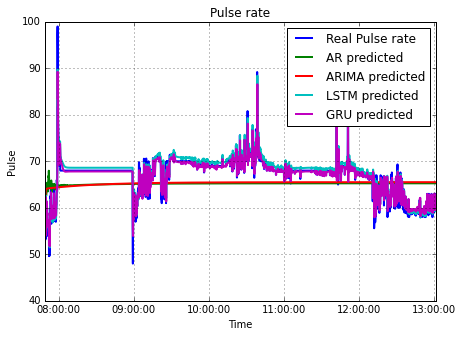

In [ ]:
# Visualising the results
plt.figure(figsize=[7,5])

plt.plot(df2.loc[int(len(X)*0.8):, 'Time and date'],dataset_test.values, label = 'Real Pulse rate',lw=2)
plt.plot(df2.loc[int(len(X)*0.8):, 'Time and date'],AR_predictions, label = 'AR predicted',lw=2)
plt.plot(df2.loc[int(len(X)*0.8):, 'Time and date'],arima_predictions, label = 'ARIMA predicted',lw=2)
plt.plot(df2.loc[int(len(X)*0.8):, 'Time and date'],lstm_predicted, label = 'LSTM predicted',lw=2)
plt.plot(df2.loc[int(len(X)*0.8):, 'Time and date'],gru_predicted,label = 'GRU predicted',lw=2)

plt.grid()

plt.title('Pulse rate')
plt.xlabel('Time')
plt.ylabel('Pulse')
plt.legend()
plt.show()

NameError: ignored

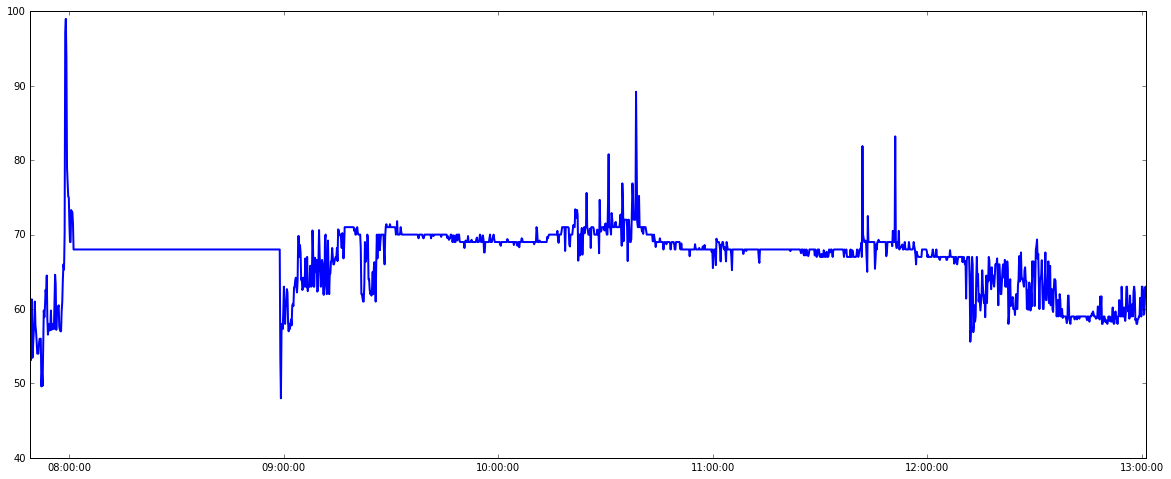

In [ ]:
# Visualising the results
plt.figure(figsize=[20,8])
plt.plot(df2.loc[int(len(X)*0.8):, 'Time and date'],dataset_test.values, label = 'Real heart rate',lw=2)
plt.plot(df2.loc[int(len(X)*0.8):, 'Time and date'],predictions, label = 'ARIMA predicted',lw=2)
plt.plot(df2.loc[int(len(X)*0.8):, 'Time and date'],lstm_predicted, label = 'LSTM predicted',lw=2)
plt.plot(df2.loc[int(len(X)*0.8):, 'Time and date'],gru_predicted,label = 'GRU predicted',lw=2)
plt.plot(df2.loc[int(len(X)*0.8):, 'Time and date'],dir_predictions, label = 'AR predicted',lw=2)

plt.title('Heart rate')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

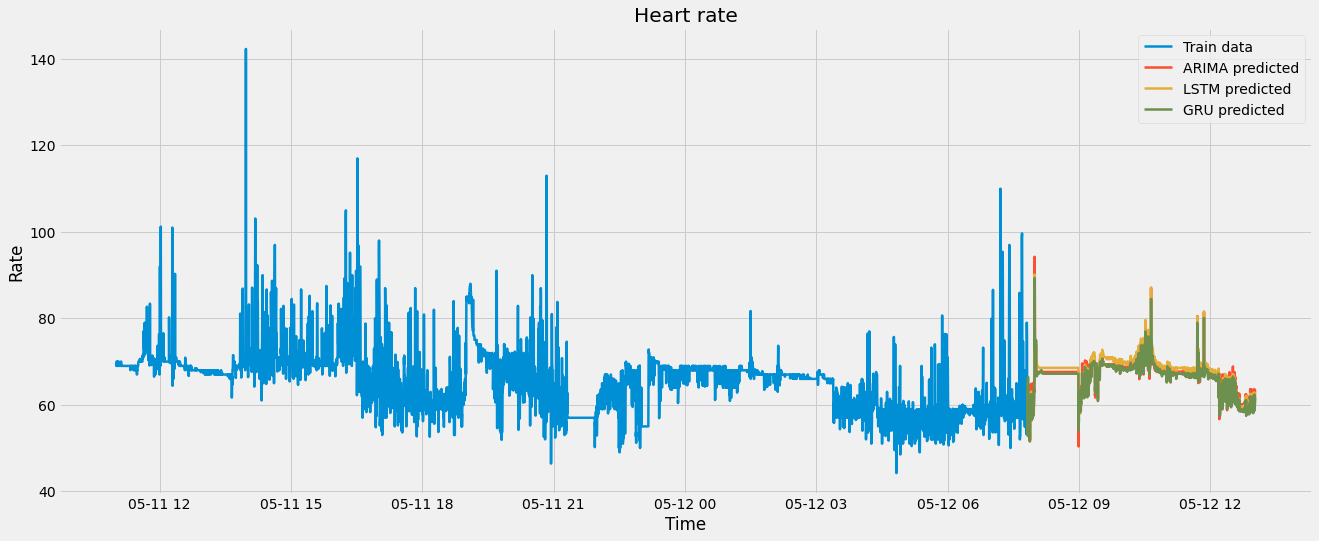

In [ ]:
# Visualising the results
plt.figure(figsize=[20,8])
plt.plot(df2.loc[:int(len(X)*0.8)-1, 'Time and date'],dataset_train.values, label = 'Train data',lw=2.5)
# plt.plot(df2.loc[int(len(X)*0.8):, 'Time and date'],dataset_test.values, label = 'Real heart rate')
plt.plot(df2.loc[int(len(X)*0.8)-1:, 'Time and date'],[None for i in dataset_train]+[x for x in predictions], label = 'ARIMA predicted',lw=2.5)
plt.plot(df2.loc[int(len(X)*0.8)-1:, 'Time and date'],[None for i in dataset_train]+[x for x in lstm_predicted], label = 'LSTM predicted',lw=2.5)
plt.plot(df2.loc[int(len(X)*0.8)-1:, 'Time and date'],[None for i in dataset_train]+[x for x in gru_predicted],label = 'GRU predicted',lw=2.5)


plt.title('Heart rate')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

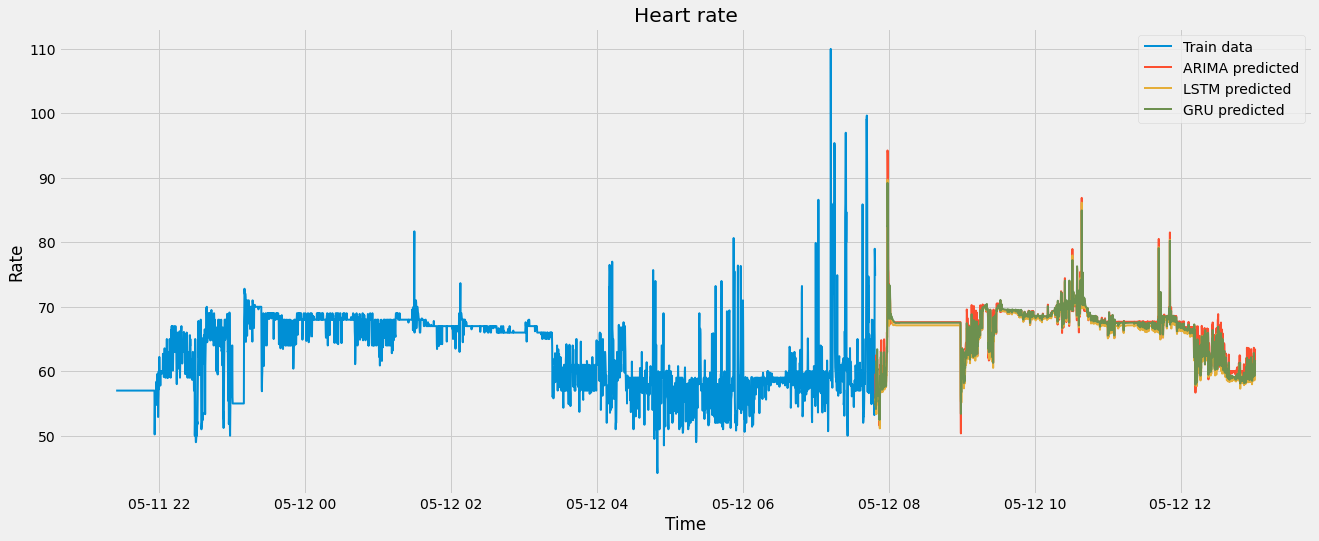

In [ ]:
# Visualising the results
plt.figure(figsize=[20,8])
plt.plot(df2.loc[int(len(X)*0.8/2)+1:int(len(X)*0.8)-1, 'Time and date'],dataset_train[int(len(X)*0.8/2):int(len(X)*0.8)-1].values, label = 'Train data',lw=2)
# plt.plot(df2.loc[int(len(X)*0.8):, 'Time and date'],dataset_test.values, label = 'Real heart rate')
plt.plot(df2.loc[int(len(X)*0.8)-1:, 'Time and date'],[None for i in dataset_train]+[x for x in predictions], label = 'ARIMA predicted',lw=2)
plt.plot(df2.loc[int(len(X)*0.8)-1:, 'Time and date'],[None for i in dataset_train]+[x for x in lstm_predicted], label = 'LSTM predicted',lw=2)
plt.plot(df2.loc[int(len(X)*0.8)-1:, 'Time and date'],[None for i in dataset_train]+[x for x in gru_predicted],label = 'GRU predicted',lw=2)
# plt.plot(df2.loc[int(len(X)*0.8)-1:, 'Time and date'],[None for i in dataset_train]+[x for x in dir_predictions],label = 'AR predicted',lw=2)


plt.title('Heart rate')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

The fast and powerful methods that we rely on in machine learning, such as using train-test splits and k-fold cross validation, do not work in the case of time series data. This is because they ignore the temporal components inherent in the problem

In [ ]:

plt.figure(figsize=(20,8))
plt.plot(train_data)
plt.plot([None for i in train_data]+[x for x in test_data])
plt.plot([None for i in train_data]+[x for x in lstm_predicted])
plt.plot([None for i in train_data]+[x for x in predictions])

plt.legend(["Training data", "Testing data","lstm_predicted","Arima predicted data" ])
plt.show()

NameError: ignored